# Chicago Public School Statistical Analysis for High Schools
### A Descriptive and Correlational Research Study
In this code, we will be doing a data analysis on Chicago Public Schools to provide insight to the attributes that are most indicative or correlated with how a student is likely to perform in school. It will be focused on data visualizations with a statistical approach to interpretations.

Table of Contents:
- 1) Data Collection 
- 2) Exploratory Data Analysis
- 3) Missing Values Imputation
- 4) Statistical Analysis and Data Visualization
- 5) Correlational Analysis and Data Visualization


#### Data Collection
We can download the public dataset from Kaggle.com at https://www.kaggle.com/chicago/chicago-public-schools-data?select=chicago-public-schools-high-school-progress-report-2013-2014.csv

At this time, the data has elementary and high school progress reports from 2013-2014. We will be focusing on just the high school data.

In [1]:
import pandas as pd

# Import data from csv file
df = pd.read_csv('chicago-public-schools-high-school-progress-report-2013-2014.csv')
print(f'This is the dateframe shape: {df.shape}')
print('These are the columns:')
print(df.columns)
print(df.head(5))

This is the dateframe shape: (188, 103)
These are the columns:
Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'Blue Ribbon Award',
       'CPS Performance Policy Level',
       ...
       'Y Coordinate', 'Longitude', 'Latitude', 'Location',
       'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes',
       'Census Tracts', 'Wards', 'Historical Wards 2003-2015'],
      dtype='object', length=103)
   School ID                                    Name of School  \
0     610572                   Camelot Safe Academy Elementary   
1     400133           YCCS-Innovations of Arts Integration HS   
2     400148  Instituto Justice and Leadership Acad Charter HS   
3     609761                      George H Corliss High School   
4     609716                           Kelvyn Park High School   

            Street Address     City State  ZIP Code     Phone Number  \
0           125 S Clark St  Chicago    IL     60603  (7

### Exploratory Data Analysis
#### Trimming the columns
There are 188 rows or data observations and a staggering 103 columns or features/attributes. 

We will:
- 1) drop duplicate values
- 2) check with columns that have null values and drop those
- 3) trim the columns/attributes with what we believe, within reason, that should have no correlation with school performance (a priori knowledge)

In [2]:
# Drop duplicates
df = df.drop_duplicates()
print(f'Number of rows after dropping dupes: {df.shape}')

# Check which columns have null values
null_cols = len(df.columns[df.isna().any()])
print(f'Number of columns with null values: {null_cols}')

Number of rows after dropping dupes: (188, 103)
Number of columns with null values: 82


The number of columns with null values are larger than expected. We have several options for missing values. 

We could either:
- Take the average for that column and fill the missing values in (imputation)
- Remove the data point/row with the missing value from the dataset
- Predict the value with regression or k-NN

This usually depends on how many missing values we have for that particular column so we will use a mixed approach. 

We will first select the columns that have a certain amount of its data missing and remove those columns.

Then we will remove columns with a priori assumptions of its correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

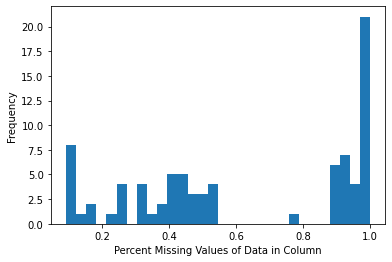

In [3]:
import matplotlib.pyplot as plt

# Show all rows
#pd.set_option("display.max_rows", None)

# Percentage of null values per column with nulls
null_list = df.columns[df.isna().any()] # Pull out all columns with nulls
null_list = df[null_list.to_numpy()].isna().sum()/df.shape[0]

# Using a histogram to see the distribution of missing values
null_hist = plt.hist(null_list, bins=30)
plt.xlabel('Percent Missing Values of Data in Column')
plt.ylabel('Frequency')
plt.show

We can see that of columns that have missing values, the largest portion of them are missing all of their values (the 1.0 bin).

Using this distribution of missing values, we will drop columns that are missing 50% or more of their values to retain columns that may still work well after we impute the missing values.

In [4]:
# Remove columns with too many missing values
threshold = 0.3 # We can better focus our analysis with a lower threshold since there are so many columns
nan_list = df.columns[df.isna().sum() > (threshold * df.shape[0])]
print(nan_list)

Index(['Blue Ribbon Award', 'Probation Length',
       'NWEA Reading Growth Percentile All Grades',
       'NWEA Reading Growth Percentile Grade 3',
       'NWEA Reading Growth Percentile Grade 4',
       'NWEA Reading Growth Percentile Grade 5',
       'NWEA Reading Growth Percentile Grade 6',
       'NWEA Reading Growth Percentile Grade 7',
       'NWEA Reading Growth Percentile Grade 8', 'NWEA Math Growth All Grades',
       'NWEA Math Growth Grade 3', 'NWEA Math Growth Grade 4',
       'NWEA Math Growth Grade 5', 'NWEA Math Growth Grade 6',
       'NWEA Math Growth Grade 7', 'NWEA Math Growth Grade 8',
       'NWEA Reading Attainment Percentile All Grades',
       'NWEA Reading Attainment Percentile Grade 2',
       'NWEA Reading Attainment Percentile Grade 3',
       'NWEA Reading Attainment Percentile Grade 4',
       'NWEA Reading Attainment Percentile Grade 5',
       'NWEA Reading Attainment Percentile Grade 6',
       'NWEA Reading Attainment Percentile Grade 7',
       'NWEA

In [5]:
# Remove columns
df = df.drop(columns=nan_list.to_numpy())

# Print and show the remaining columns
df.columns

Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'My Voice, My School Overall Rating',
       'Student Response Rate', 'Teacher Response Rate', 'Involved Family',
       'Supportive Environment', 'Ambitious Instruction', 'Effective Leaders',
       'Collaborative Teachers', 'Safe', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'Healthy Schools Certification', 'Creative Schools Certification',
       'EPAS Growth Percentile', 'EPAS Attainment Percentile',
       'Grade ACT Attainment Percentile Grade 11',
       'ACT Spring 2013 Average Grade 11',
       'Student Attendance Percentage 2013',
       'Student Attendance Percentage 2012',
       'One-Year DropOut Rate Percentage 2013',
       'One-Year DropOut Rate Percentage 2012', 'X Coordinate', 'Y Coordinate',
       'Longitude', 'Latitude', 'Location'],

Now we will analyze these columns to see whether we should remove that data point/row, impute the values in the columns, or remove the column with a priori assumptions of its correlation.

In [6]:
# Check missing values
df.isna().sum() / df.shape[0]

School ID                                   0.000000
Name of School                              0.000000
Street Address                              0.000000
City                                        0.000000
State                                       0.000000
ZIP Code                                    0.000000
Phone Number                                0.090426
Website                                     0.000000
CPS Performance Policy Level                0.250000
CPS Performance Policy Status               0.250000
My Voice, My School Overall Rating          0.000000
Student Response Rate                       0.101064
Teacher Response Rate                       0.101064
Involved Family                             0.000000
Supportive Environment                      0.000000
Ambitious Instruction                       0.000000
Effective Leaders                           0.000000
Collaborative Teachers                      0.000000
Safe                                        0.

#### Dropping some columns/attributes via the Data Scientist's discretion
The list also shows a number of columns where the same data was collected for two years in a row, columns such as "Student Attendance Percentage 2012" and "Student Attendance Percentage 2013". It could have been potentially insightful if we could identify a trend over a longer period of time than two years but since we only have two years, two data points in time is not enough samples to reject any null hypothesis concerning trends over time. 

Although we could analyze the two years to identify if any differences are statistically significatn, we can not make any inferences regarding growth or decline. For our analysis, we will avoid observations concerning time, choosing instead to focus our analysis on a snapshot of the schools for a particular year. Therefore, for our purposes, we will drop the earlier 2012 data along with the attributes we feel a priori have no correlation, like "Website".

In [7]:
# We assume the following columns will not show any significant correlation with the school's performance
apriori_list = [
    'School ID',
    'Name of School',
    'Street Address',
    'City', 
    'State', 
    'Phone Number',
    'Website',
    'Student Attendance Percentage 2012',
    'One-Year DropOut Rate Percentage 2012',
    'X Coordinate', # We will use the latitude and longitude instead
    'Y Coordinate',
    'Location' # From the five rows in the beginning of the notebook, we see this is just a dictionary of latitude and longitudes. We could keep either/or
]

# Remove columns
df = df.drop(columns=apriori_list)

# Print and show the remaining columns
df.columns

Index(['ZIP Code', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'My Voice, My School Overall Rating',
       'Student Response Rate', 'Teacher Response Rate', 'Involved Family',
       'Supportive Environment', 'Ambitious Instruction', 'Effective Leaders',
       'Collaborative Teachers', 'Safe', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'Healthy Schools Certification', 'Creative Schools Certification',
       'EPAS Growth Percentile', 'EPAS Attainment Percentile',
       'Grade ACT Attainment Percentile Grade 11',
       'ACT Spring 2013 Average Grade 11',
       'Student Attendance Percentage 2013',
       'One-Year DropOut Rate Percentage 2013', 'Longitude', 'Latitude'],
      dtype='object')

Sometimes there may be discrepancies in the data collection where missing values are explicitly entered as "Incomplete" or "No Data", rather than left as a null value. 

We continue our exploratory data analysis on the categorical columns and the numerical columns to determine if that is the case. If so, we can trim our columns further before making any meaningful statistical analysis.

In [8]:
# Check column data types to isolate string columns
df.dtypes

ZIP Code                                      int64
CPS Performance Policy Level                 object
CPS Performance Policy Status                object
My Voice, My School Overall Rating           object
Student Response Rate                       float64
Teacher Response Rate                       float64
Involved Family                              object
Supportive Environment                       object
Ambitious Instruction                        object
Effective Leaders                            object
Collaborative Teachers                       object
Safe                                         object
School Community                             object
Parent-Teacher Partnership                   object
Quality of Facilities                        object
Healthy Schools Certification                object
Creative Schools Certification               object
EPAS Growth Percentile                      float64
EPAS Attainment Percentile                  float64
Grade ACT At

In [9]:
# Isolate interval/ratio "numerics" type of measurements from nominal/ordinal "categorical" measurements
num_cols = df.select_dtypes(include = ['float64', 'int64'])
str_cols = df.select_dtypes(include = 'object')

# Peek inside the string columns
print(str_cols.head(5))

# Explore the separate data types
print(str_cols.describe())

  CPS Performance Policy Level CPS Performance Policy Status  \
0                          NaN                           NaN   
1                          NaN                           NaN   
2                          NaN                           NaN   
3                      LEVEL 3                  ON PROBATION   
4                      LEVEL 3                  ON PROBATION   

  My Voice, My School Overall Rating  Involved Family Supportive Environment  \
0                    NOT ENOUGH DATA  NOT ENOUGH DATA        NOT ENOUGH DATA   
1                     WELL-ORGANIZED          NEUTRAL                 STRONG   
2                     WELL-ORGANIZED             WEAK                 STRONG   
3               MODERATELY ORGANIZED          NEUTRAL                NEUTRAL   
4                  NOT YET ORGANIZED             WEAK                   WEAK   

  Ambitious Instruction Effective Leaders Collaborative Teachers  \
0       NOT ENOUGH DATA   NOT ENOUGH DATA        NOT ENOUGH DATA  

The head shows that our categorical columns actually use "NOT ENOUGH DATA" and "INCOMPLETE DATA" as an indicator for misisng values. We'll check the frequency of these categories and whether they meet our threshold for misisng data to decide if we should keep the column for our statistical analysis.

# Frequency of missing data strings
for column in str_cols.columns:
    NED_count = len(df[df[column].str.contains('NOT ENOUGH DATA',na=True)])
    ID_count = len(df[df[column].str.contains('INCOMPLETE DATA',na=False)]) # Avoid double counting
    proportion = int((NED_count + ID_count) * 100 / df.shape[0])
    print(f'{column} has {proportion}% missing data.')

Before we can impute the missing data, we will remove the "NOT ENOUGH DATA" and "INCOMPLETE DATA" tags so that the imputer can replace them correctly.

In [10]:
import numpy as np

#for column in str_cols.columns:
df = df.replace('NOT ENOUGH DATA', np.nan)
df = df.replace('INCOMPLETE DATA', np.nan)
    
# Check missing values
df.isna().sum() / df.shape[0]

ZIP Code                                    0.000000
CPS Performance Policy Level                0.329787
CPS Performance Policy Status               0.250000
My Voice, My School Overall Rating          0.159574
Student Response Rate                       0.101064
Teacher Response Rate                       0.101064
Involved Family                             0.212766
Supportive Environment                      0.239362
Ambitious Instruction                       0.239362
Effective Leaders                           0.212766
Collaborative Teachers                      0.212766
Safe                                        0.239362
School Community                            0.707447
Parent-Teacher Partnership                  0.707447
Quality of Facilities                       0.707447
Healthy Schools Certification               0.000000
Creative Schools Certification              0.627660
EPAS Growth Percentile                      0.239362
EPAS Attainment Percentile                  0.

We will remove the columns greater than our threshold. 

In [11]:
# Drop more missing data columns 
nan_list2 = df.columns[df.isna().sum() >= (threshold * df.shape[0])]

df = df.drop(columns=nan_list2.to_numpy())

### Imputation of Missing Data
#### MCAR vs MAR vs MNAR
We now have our columns of interest to start imputing the data. Some columns have little missing data while others have up 50% missing. What type of missing values do they fall under?

If they are:
- MCAR (Missing Completely At Random), remove the rows without affecting the data's bias.
- MAR (Missing At Random), we could apply imputation
- MNAR (Missing Not At Random), which would be problematic.

However, it is not possible to determine if the missing values are MAR or MNAR, only if they are *not* MCAR. That is, you can only determine if the missing values are MCAR or not, but you can determine if they are MAR or MNAR since we don't know if the missing values are related to something we did not measure (which is the very definition of MNAR). Since we did not measure it, we do not have those values to make our case.

Although MCAR could be the case, MAR is a more realistic assumption so we will impute the data.

#### SimpleImputer and IterativeImputer
For the categorical columns, we will use SimpleImputer and fill the values in with the most frequent category value. 

For the numerical columns, we will use the more sophisticated multivariate imputer from sklearn, IterativeImputer. Sklearn specifically tells us this estimator is experimental so we will keep that in mind when drawing conclusions.

In [12]:
# Categorical values imputation
from sklearn.impute import SimpleImputer

s_imputer = SimpleImputer(strategy='most_frequent')

# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

i_imputer = IterativeImputer(n_nearest_features=5,random_state=17)

for column in df.columns:
    if column in df.select_dtypes(include='object'):
        df[column] = s_imputer.fit_transform(df[column].values.reshape(-1,1)) # Rows with single column
    elif column in df.select_dtypes(include='number'):
        df[column] = i_imputer.fit_transform(df[column].values.reshape(-1,1))

In [13]:
# Check null values in all of the data
print(f'Number of nulls in the entire dataframe: {df.isna().sum().sum()}')

# Peek into the first few rows
print(df.describe(include='all'))

# Our final columns for analysis
df.dtypes

Number of nulls in the entire dataframe: 0
            ZIP Code CPS Performance Policy Status  \
count     188.000000                           188   
unique           NaN                             3   
top              NaN              NOT ON PROBATION   
freq             NaN                            97   
mean    60627.750000                           NaN   
std        20.666081                           NaN   
min     60602.000000                           NaN   
25%     60616.000000                           NaN   
50%     60623.000000                           NaN   
75%     60639.000000                           NaN   
max     60827.000000                           NaN   

       My Voice, My School Overall Rating  Student Response Rate  \
count                                 188             188.000000   
unique                                  5                    NaN   
top                             ORGANIZED                    NaN   
freq                                

ZIP Code                                    float64
CPS Performance Policy Status                object
My Voice, My School Overall Rating           object
Student Response Rate                       float64
Teacher Response Rate                       float64
Involved Family                              object
Supportive Environment                       object
Ambitious Instruction                        object
Effective Leaders                            object
Collaborative Teachers                       object
Safe                                         object
Healthy Schools Certification                object
EPAS Growth Percentile                      float64
EPAS Attainment Percentile                  float64
Grade ACT Attainment Percentile Grade 11    float64
ACT Spring 2013 Average Grade 11            float64
Student Attendance Percentage 2013          float64
One-Year DropOut Rate Percentage 2013       float64
Longitude                                   float64
Latitude    

### Statistical Analysis
#### Descriptive Analysis of Distributions, Central Tendencies, and Variability
Now we can begin analyzing our data to see what it tells us. We'll first examine some of our categorical columns, not necessarily all of them but the ones we are curious about.

From CPS' website about the metric, 'CPS Performance Policy Level':
- "CPS uses five performance ratings to measure a school’s rating: 
    - Levels 1+, 1, and 2+ (Good Standing), 
    - Level 2 (Provisional Support), and 
    - Level 3 (Intensive Support)."

It would be interesting to see how this policy determination is reflected on certain academic performances as well as non-academic performances such as attendance. Keep in mind that we chose to impute about 30% of policy level's data.

C:\Users\doejo\AppData\Local\Temp\ipykernel_5760\3009813131.py:42: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


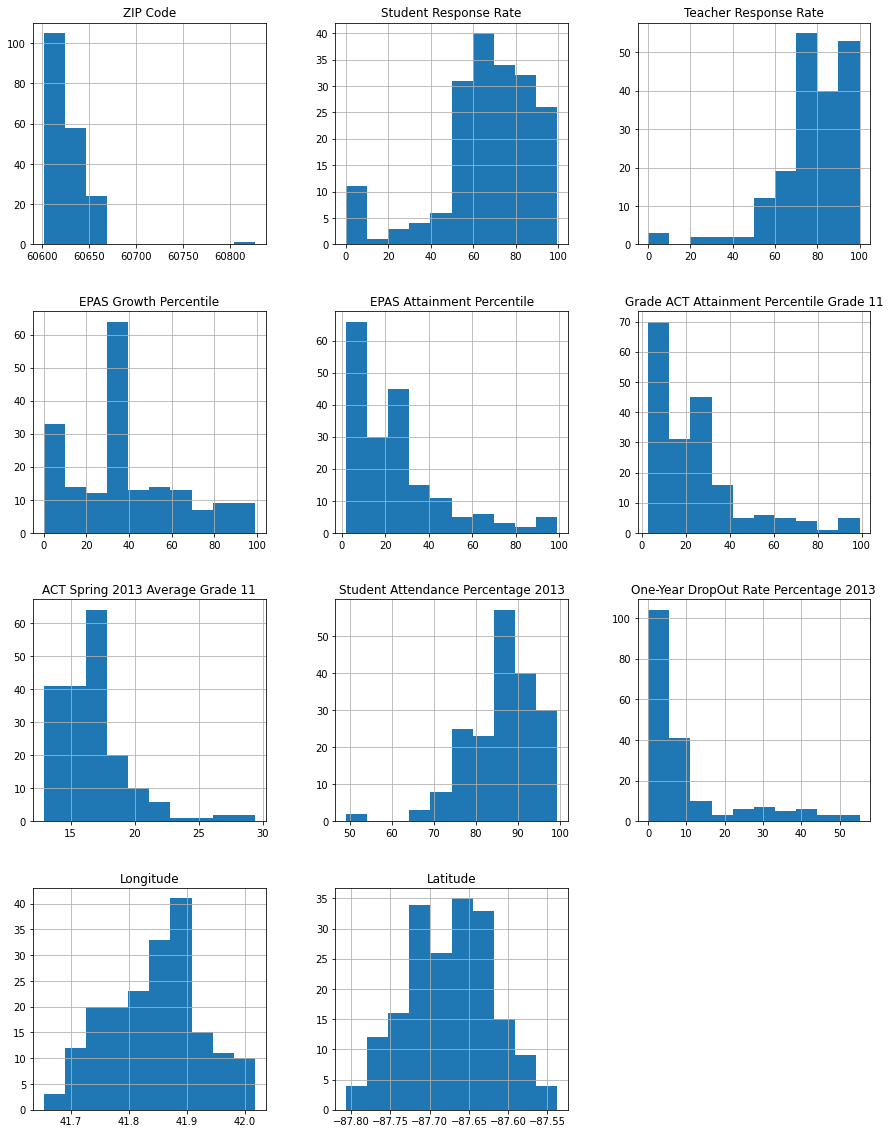

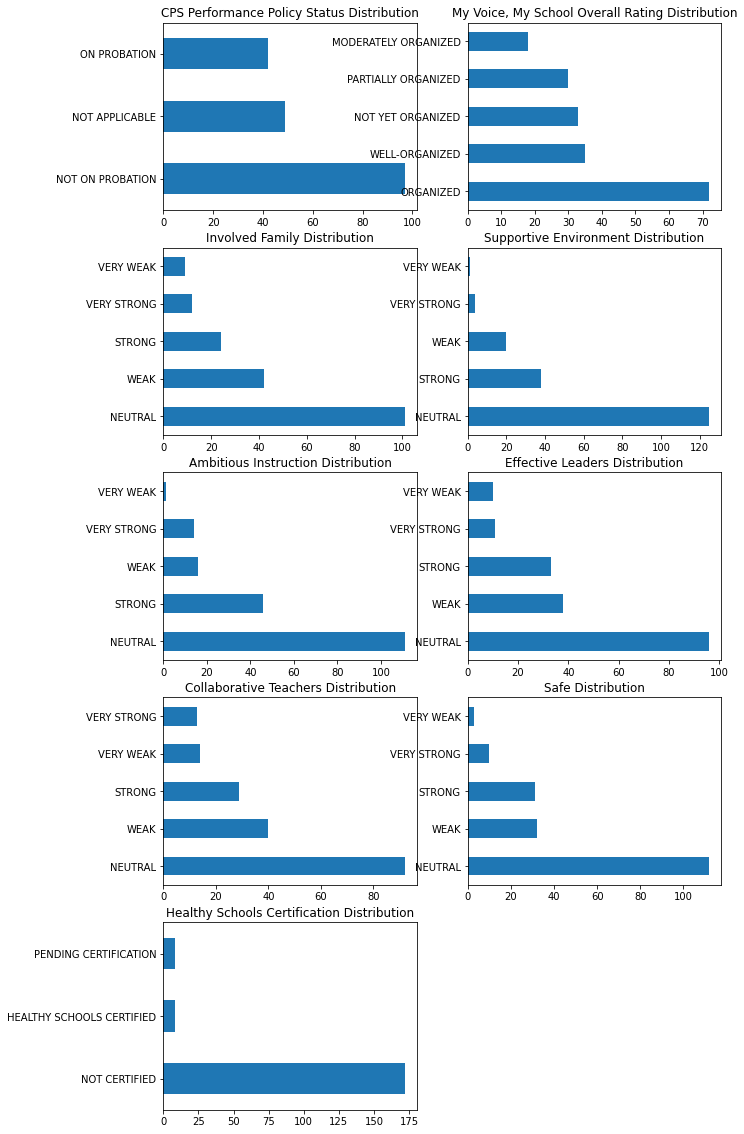

In [14]:
# Data Visualization
import seaborn as sns
import math


# Categorical columns
def cat_histograms(df):
    """
    Plot histograms of all the categorical columns in a dataframe
    
    Parameters:
        df = dataframe
    Return:
        Grid of histograms
    """
    
    fig = plt.figure(figsize = (10,20))
                     
    str_cols = df.select_dtypes(include='object')

    for i, column in enumerate(str_cols):
        ax = fig.add_subplot(5, 2, (i+1))
        ax.set_title(column + " Distribution")
        df[column].value_counts().plot(kind='barh', ax=ax) # Using horizontal bars to read labels
        
    plt.show()
    

# Numerical Columns
def num_histograms(df):
    """
    Plot histograms of all the numerical columns in a dataframe
    
    Parameters:
        df = dataframe
    Return:
        Grid of histograms
    """
    
    fig = plt.figure(figsize = (15,20))
    ax = fig.gca()
    df.hist(ax = ax)
    plt.show()

num_histograms(df)
cat_histograms(df)


# Category to compare certain attributes on
compare_on = 'CPS Performance Policy Status'
#multi_hist(compare_on)

The histograms for the numerical columns give us a good sense of the distribution, the median, and the variability for the data collection.

You'll notice that certain categorical histograms are of the following:
- nominal (no ranking), such as "CPS Performance Policy" with "On Probation" vs "Not on probation"
- ordinal (has ranking), such as "Involved Family Distribution" with "Very Weak" vs "Weak" vs "Strong" vs "Very Strong"

Our bar graphs do not list the ordinal measurements by ranking since the algorithm does not understand how to automatically determine this. Instead, they are ordered by counts and the visual distributions does not offer the same intuitions as the numerical ones unless we manually organize the bins ourselves.

### Correlational Analysis
For our correlational study, we will use Spearman's correlation coefficients since the distribution over the numerical columns don't show a normal distribution, which is the assumption under the more popular, Pearson's correlation coefficients.

We will use a heatmap to visually show the correlation strengths and also plot some numerical distributions across certain categories of interest.

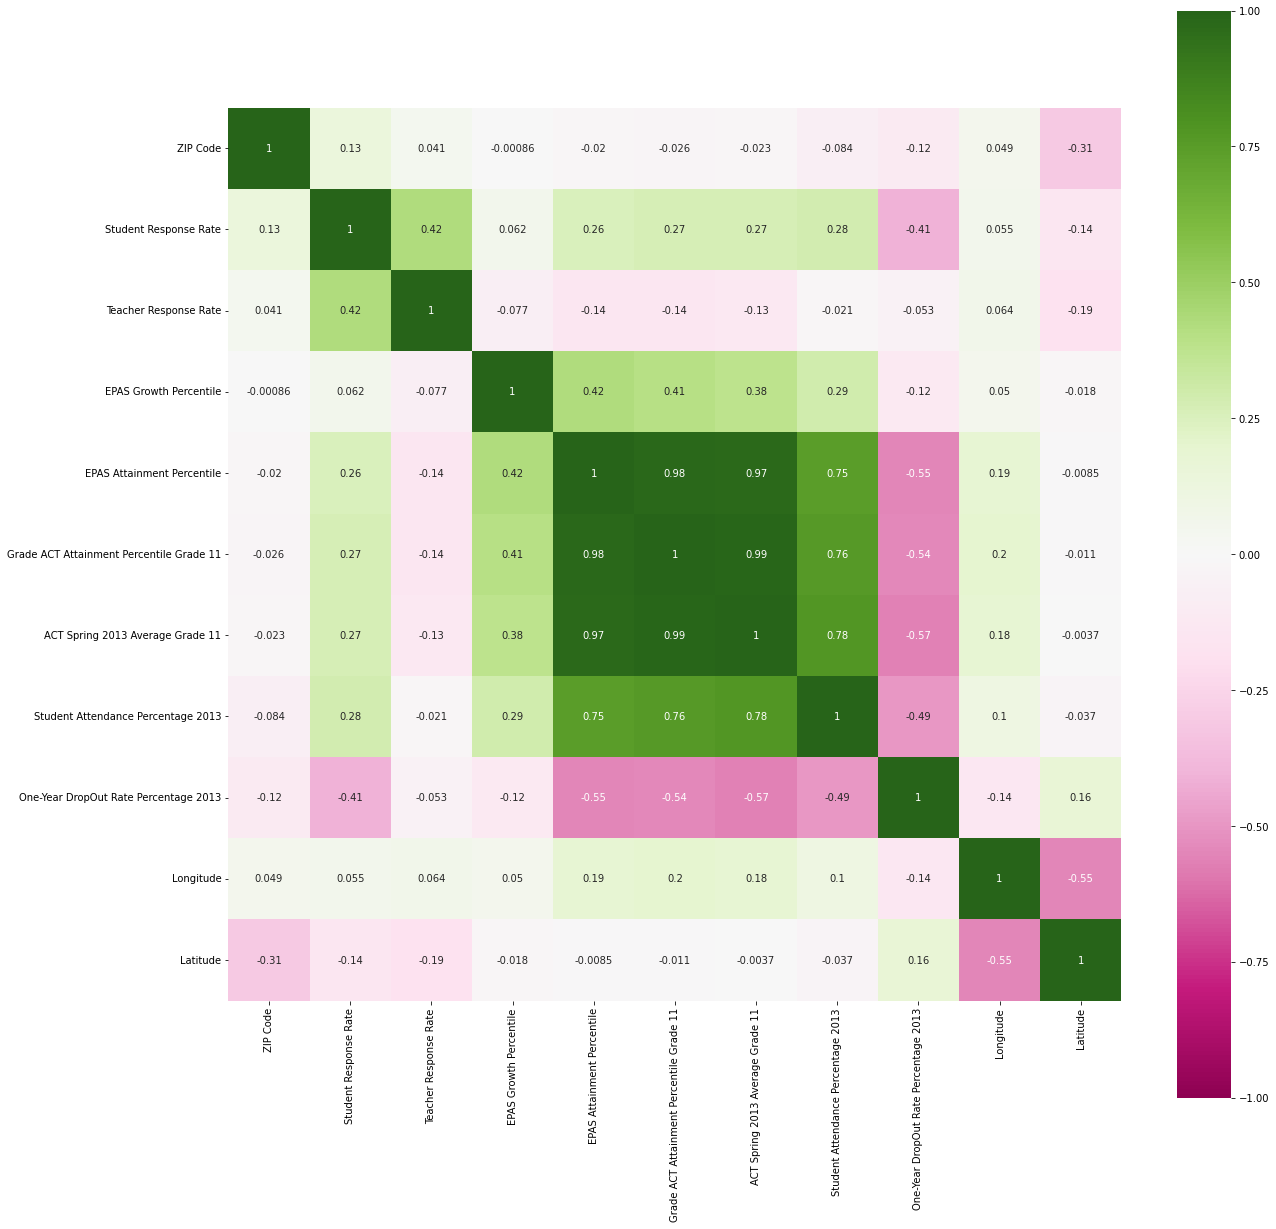

In [15]:
def corr_heatmap(df):
    """
    Create a heatmap of Spearman's correlations
    
    Parameter:
        df: dataframe
    Return:
        None: plot heatmap
    """
    corr = df.corr('spearman')
    #mask = np.zeros_like(corr)
    #mask[np.triu_indices_from(mask, k=1)] = True
    
    plt.figure(figsize=(20,20))
    sns.heatmap(
        corr, 
        cmap = "PiYG", # So 0 will have the lightest color
        vmin=-1,
        vmax=1,
        square=True, 
        linecolor = 'k', 
        #mask=mask,
        annot=True)
    plt.show()


corr_heatmap(df)

#### Correlational Heatmap Analysis
Let's take a look at our correlation heatmap for some insight. The heatmap is lightest at correlation coefficients of 0 and get more purple towards -1 and more green towards +1. Darker color indicate a heavier intensity as well as strong correlation.

Zip code, latitude, and longitude don't really tell us anything since the Chicagoland area has schools so dispersed. We will revisit these attributes.

The very dark squares at the center between "EPAS Attainment Percentile", "Grade ACT Attainment Percentile Grade 11", "ACT Spring 2013 Average Grade 11", and "Student Attendance Percentage 2013" show a high positive correlation coefficient with each other. This sort of makes sense since we kind of expect for schools that perform well to have good attendance, good grades, and good attainment (defined as a child's achievement in school). 

More interestingly, we also see a negative correlation for these same attributes with "One-Year Dropout Rate Percentage 2013", albeit weaker but still above 0.5 in intensity. It would make sense that better performing schools probably have lower dropout rates.

- **Schools that perform well, often perform well consistently across performance metrics, and have lower dropout rates.**

Earlier histograms of categorical columns have an attribute named "My Voice, My School Overall Rating" where students can rate their schools. We will plot the four positively correlated attributes along with the negatively correlated attributes and see what it can show us.

<Figure size 432x288 with 0 Axes>

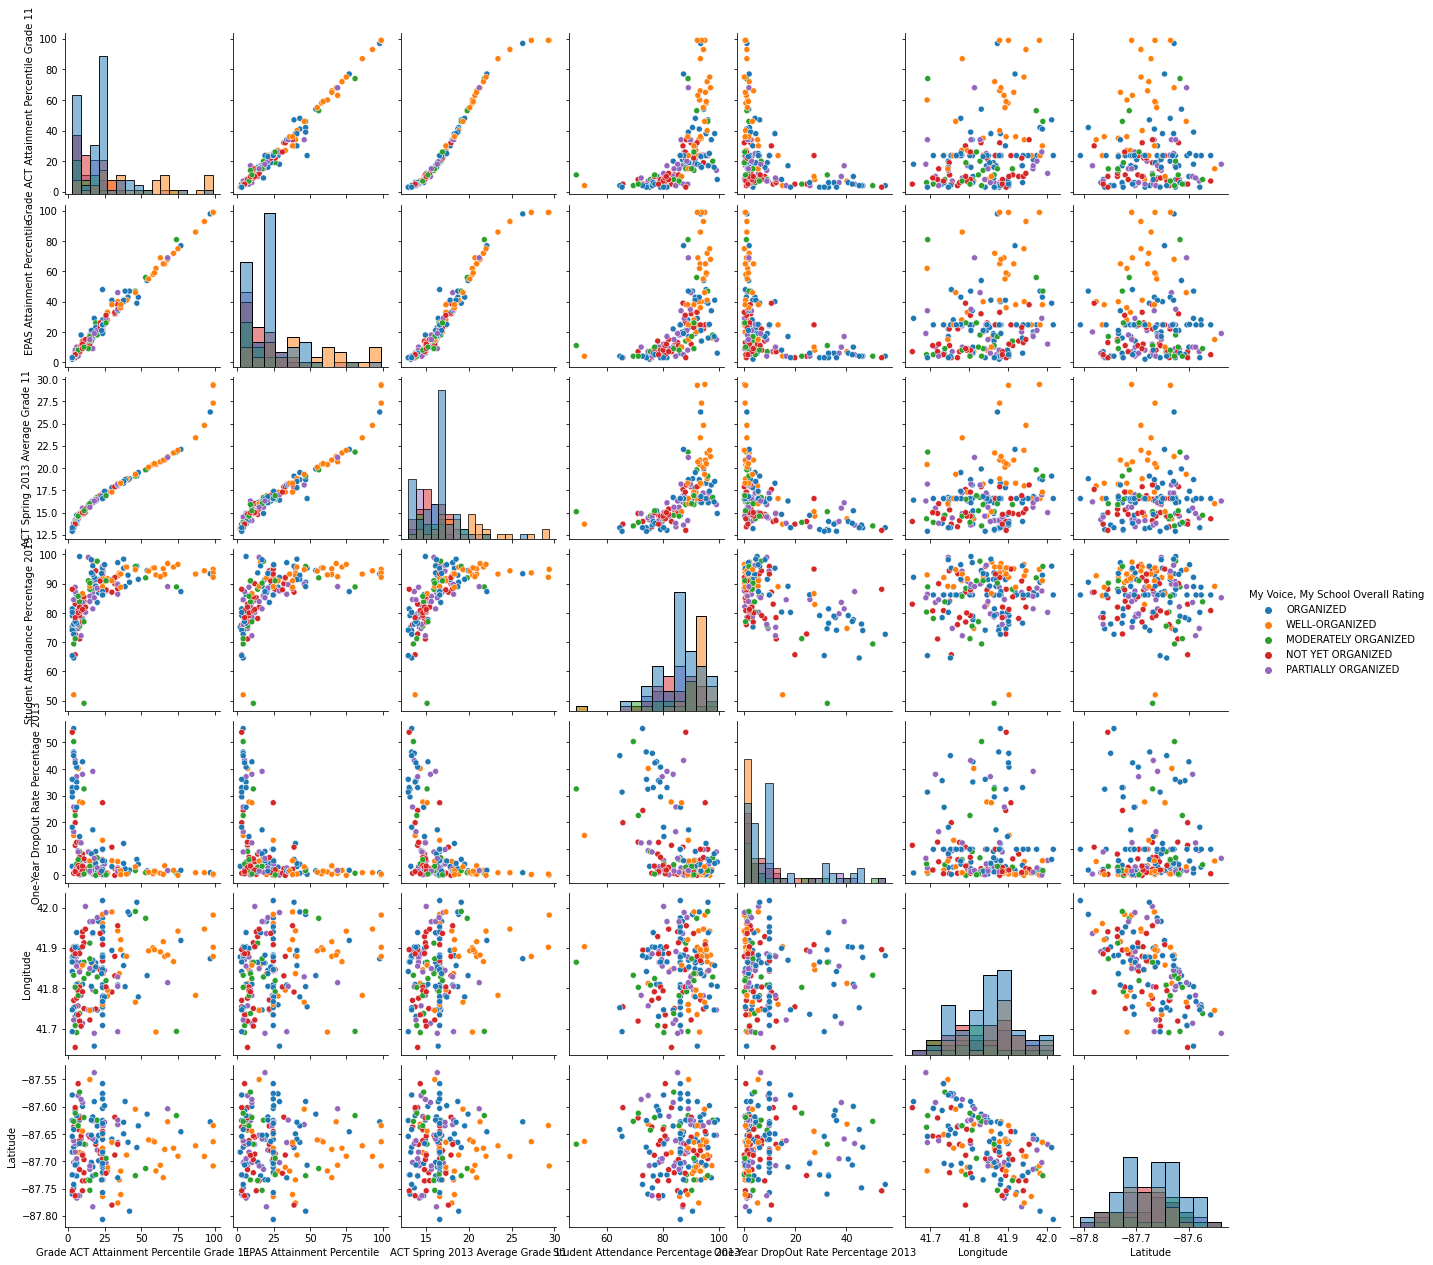

In [22]:
# Stacked histograms over a certain category
def pairplot(attr):
    """
    Create a pairplot across category x
    
    Parameters:
        attr = categorical column
    Return:
        Grid of plots
    """

    var = ["Grade ACT Attainment Percentile Grade 11", 
          "EPAS Attainment Percentile", 
          'ACT Spring 2013 Average Grade 11', 
          'Student Attendance Percentage 2013',
          'One-Year DropOut Rate Percentage 2013',
          'Longitude',
          'Latitude'
          ]
    
    plt.figure()
    sns.pairplot(
        data = df,
        x_vars=var,
        y_vars=var,
        hue=attr,
        diag_kind='hist'
    )

pairplot('My Voice, My School Overall Rating')

#### Pairplot Analysis
Our scatterplots for "EPAS Attainment Percentile", "Grade ACT Attainment Percentile Grade 11", and "ACT Spring 2013 Average Grade 11" show that schools that were 

- **"ORGANIZED" and "WELL-ORGANIZED" would spread towards higher percentages more often than "NOT YET ORGANIZED" and "PARTIALLY ORGANIZED".**

- **"NOT YET ORGANIZED" and "PARTIALLY ORGANIZED" seem to be more frequent at the lower spectrum of these performance scores.**

- **Less organized schools seem to have lower performances.**

Within student attendance percentage, more organized schools also seem to show a tendency to cluster at higher grades and lower dropouts.

Also something to note, "NOT YET ORGANIZED","PARTIALLY ORGANIZED", and "ORGANIZED" schools make up a majority of the variance in dropout rates, while "WELL-ORGANIZED" schools are tightly packed towards 0.

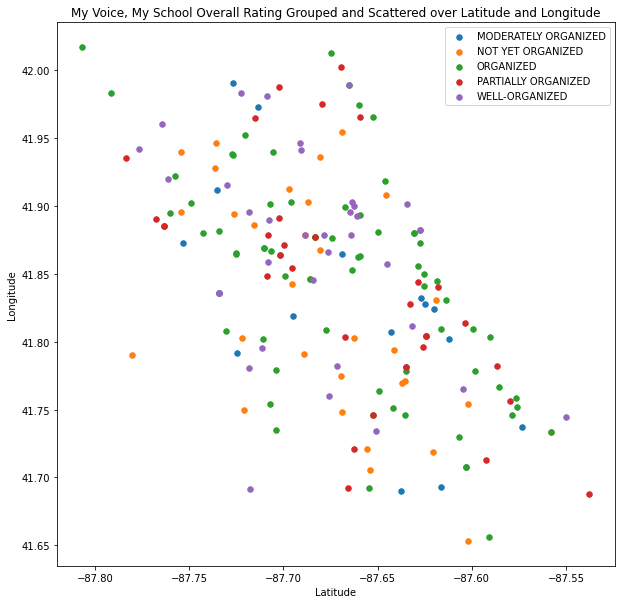

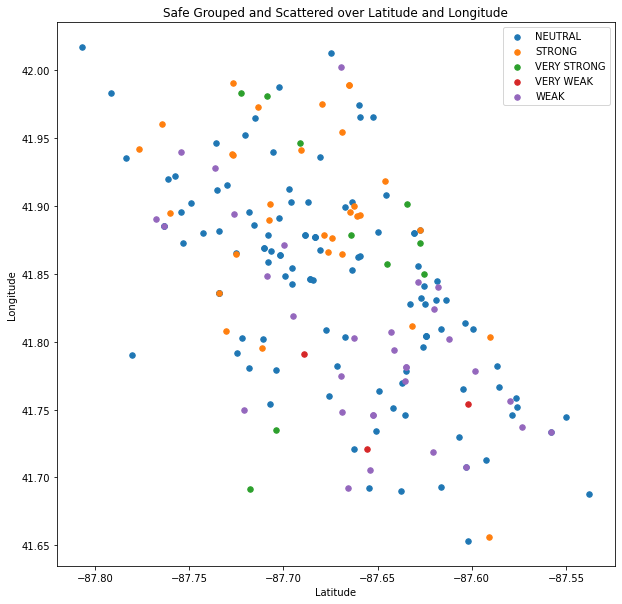

In [19]:
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.preprocessing import LabelEncoder

# A 3D scatterplot over latitude and longitude
def scatter(attr):
    """
    Create a scatterplot
    
    Parameters:
        x: x-coordinates
        y: y-coordinates
    Return:
        Create a scatter plot
    """
    
    # Axes
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca()

    for k,d in df.groupby(attr):
        ax.scatter(d['Latitude'], d['Longitude'], s=30, label=k)

    ax.set_title(attr + " Grouped and Scattered over Latitude and Longitude")
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')   
    ax.legend()

    plt.show()


scatter('My Voice, My School Overall Rating')
scatter('Safe')

#### Longitudinal Analysis
Here we distributed two attributes, "My Voice, My School Overall Rating" and "Safe", over their relative real-life positions via latitude and longitude. 

*Note* It is unfortunate that these matplotlib plots share the same colors as the previous seaborn plots with DIFFERENT colors for corresponding labels. This is important to keep in mind.

While, there does not seem to be any pattern to their "My Voice, My School Overall Rating" distribution, the "Safe" distribution seems to have a higher concentration of "STRONG" on the north side of the plot. We will analyze a special longitude histogram to see this more clearly.

<AxesSubplot:xlabel='Count', ylabel='Longitude'>

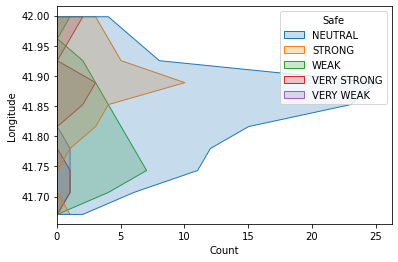

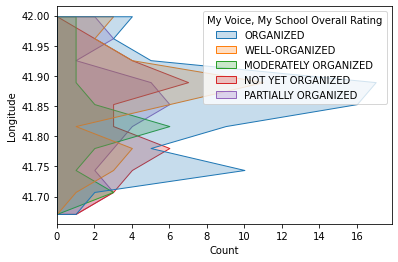

In [25]:
# Histogram along the longitude
plt.figure()
sns.histplot(data=df, y="Longitude",hue='Safe', element='poly')

plt.figure()
sns.histplot(data=df, y="Longitude",hue='My Voice, My School Overall Rating', element='poly')

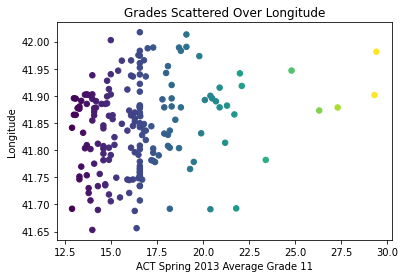

In [29]:
fig = plt.figure()
ax = fig.gca()
ax.set_title("Grades Scattered Over Longitude")
ax.set_xlabel('ACT Spring 2013 Average Grade 11')
ax.set_ylabel('Longitude')   

ax.scatter(df['ACT Spring 2013 Average Grade 11'], df['Longitude'], s=30, c=df['ACT Spring 2013 Average Grade 11'])

The discrepancy stands out better in our histogram. 

*Remember that longitudinal lines run North and South.

- **"VERY STRONG", "STRONG", and even "NEUTRAL" have peaks in the northside of the city.**
- **"VERY WEAK" and "WEAK" peak in the bottom half of the city.**

From our correlation heatmap, longitude has only a weak correlation with performance at about ~0.2. However, when we set out data grouped by "My Voice, My School Overall Rating" of organization, the longitude row shows a higher concentration of 

- **"WELL-ORGANIZED" and "ORGANIZED" have a higher density in the north side.**

## Conclusions
The data seems to show that there is a negative correlation with performance metrics and dropout rates, as one would expect.

More interestingly, the data also shows that there is a correlation between how organized a school is and how safe the school feels (reported by the students). 

- **Schools in the northside have a higher density of more organized, safer feeling schools while schools in the southside have a higher density of less organized, less safe feeling schools, at least reported by the students**

Performance does not seem to be particularly skewed towards the north, outside of a few data points as seen in the last figure.

We hope that this information helps shed some light on the situation in Chicago Public Schools, and that better changes have materialized since 2013, which is the date of this dataset.

Thank you and we hope you enjoyed the analysis.